In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime

In [3]:
now_time = datetime.now()
start_time = datetime(now_time.year - 20, now_time.month , now_time.day)
now_time
start_time


datetime.datetime(2000, 1, 12, 0, 0)

In [4]:
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
now_time
start_time

datetime.datetime(2015, 1, 12, 0, 0)

In [5]:
stock_df = web.DataReader('AAPL','yahoo', start_time, now_time)

In [6]:
#start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

    #sp_df=web.DataReader('^GSPC','yahoo', start_time, now_time)    

In [7]:
#sp_df.tail()

In [8]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [9]:
# Get the Adjusted Close Price

df = stock_df[['Open','Adj Close']]
#Take a look at the new data
df.head() 

#df.to_csv('data_stocks.csv')

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445


In [10]:
df.tail() 

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [11]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
#df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.head() 

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445


In [12]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [13]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Adj Close'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[112.59999847]
 [111.43000031]
 [109.04000092]
 ...
 [262.58999634]
 [262.70999146]
 [266.94000244]]


In [14]:
df.head(30)

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445
2015-01-20,107.839996,99.893822
2015-01-21,108.949997,100.656441
2015-01-22,110.260002,103.275063
2015-01-23,112.300003,103.807991


In [15]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [16]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Adj Close'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])




[100.38079071 101.27204895 100.88615417 ... 235.50296021 235.16397095
 234.6156311 ]


In [17]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9965554526490704


In [20]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.9958848747612623


In [22]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]
print(x_forecast) 

[[265.57998657]
 [266.6000061 ]
 [267.26998901]
 [258.30999756]
 [261.07000732]
 [263.79000854]
 [267.48001099]
 [270.        ]
 [268.6000061 ]
 [268.80999756]
 [267.77999878]
 [271.45999146]
 [277.        ]
 [279.57000732]
 [279.79998779]
 [279.5       ]
 [282.23001099]
 [280.52999878]
 [284.69000244]
 [284.82000732]
 [291.11999512]
 [289.45999146]
 [289.92999268]
 [296.23999023]
 [297.1499939 ]
 [293.79000854]
 [299.83999634]
 [297.16000366]
 [307.23999023]
 [310.6000061 ]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [23]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[265.45154733 266.51564582 267.21458127 257.86739415 260.74667455
 263.58421747 267.4336791  270.06256652 268.60207351 268.8211395
 267.74663052 271.58564982 277.36506342 280.04613064 280.28604945
 279.97309803 282.82108328 281.04760701 285.38738042 285.52300331
 292.09523779 290.36349899 290.85381077 297.43648757 298.38581599
 294.88063276 301.19206377 298.39625831 308.91183984 312.41705491]


,0
0,265.451547
1,266.515646
2,267.214581
3,257.867394
4,260.746675
5,263.584217
6,267.433679
7,270.062567
8,268.602074
9,268.821140


In [24]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [25]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [26]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [27]:
#Error 
from sklearn.metrics import mean_squared_error,r2_score
#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Open'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

0.9674795009435427

In [28]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[263.08397694 263.73029713 265.1474062  259.05838901 262.02885445
 262.77334145 265.60810653 246.59657757 264.77528086 263.46044294
 266.09361548 213.25808209 175.67010337 175.6180677  175.61795396
 175.61811559 175.617794   175.61782089 175.61779371 175.61779371
 175.61779371 175.61779371 175.61779371 175.61779371 175.61779371
 175.61779371 175.61779371 175.61779371 175.61779371 175.61779371]


In [29]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df.head()

,Open,Adj Close
Date,,
2019-11-27,265.579987,267.839996
2019-11-29,266.600006,267.250000
2019-12-02,267.269989,264.160004
2019-12-03,258.309998,259.450012
2019-12-04,261.070007,261.739990


In [30]:
new_df['Prediction']=lr_prediction

/Users/Shiva/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
new_df.tail()


,Open,Adj Close,Prediction
Date,,,
2020-01-06,293.790009,299.799988,294.880633
2020-01-07,299.839996,298.390015,301.192064
2020-01-08,297.160004,303.190002,298.396258
2020-01-09,307.239990,309.630005,308.911840
2020-01-10,310.600006,310.329987,312.417055


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')

([<matplotlib.axis.XTick at 0x1a1e3f6f60>,
 <a list of 30 Text xticklabel objects>)

In [33]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [34]:
# ignore last 30 days will used for prediction
X = stock_df[['High', 'Low', 'Open', 'Close', 'Volume']][:-forecast_out]
y = stock_df["Adj Close"][:-forecast_out].values.reshape(-1, 1)
print(X.shape, y.shape)


(1229, 5) (1229, 1)


In [35]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(X, y,  random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [37]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [38]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:


# predict last 30 days data
x_forecast = stock_df[['High', 'Low', 'Open', 'Close', 'Volume']][-forecast_out:]
model.fit(X_train, y_train)
lr_scaled_prediction = model.predict(x_forecast)

#scaled_df=pd.DataFrame()
#scaled_df['X_test_scaled']=X_test_scaled

# Open Price
#X_train_scaled
#lst=[]
#for i in X_train_scaled:
#    lst.append((i[3]))

#scaled_df['Adj Close']=lst

#scaled_df['Adj Close']=
#lr_prediction
scaled_df=stock_df[['Adj Close']].tail(30)

In [40]:
#lst=[]
#for i in pred1:
#    lst.append((i[0]))
#scaled_df['Predictions']=lst
#scaled_df.tail()
scaled_df['Predictions']=lr_scaled_prediction
scaled_df.tail(10)

,Adj Close,Predictions
Date,,
2019-12-27,289.799988,290.200873
2019-12-30,291.519989,292.117112
2019-12-31,293.649994,293.862203
2020-01-02,300.350006,300.778697
2020-01-03,297.429993,297.546070
2020-01-06,299.799988,301.007269
2020-01-07,298.390015,298.519368
2020-01-08,303.190002,304.578958
2020-01-09,309.630005,309.618252


In [41]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled) 
#len(pred1)
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 84.08508979863001, R2: 0.998664303861053


In [42]:
predict_df = stock_df


In [43]:
len(predictions) 
X_train_scaled[1]

array([-0.65064767, -0.68204807, -0.64413464, -0.69074921,  1.85367875])

In [44]:
y_test_scaled[1]

array([1.2583728])

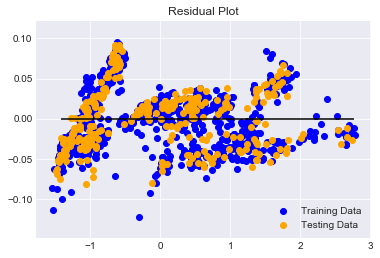

In [45]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

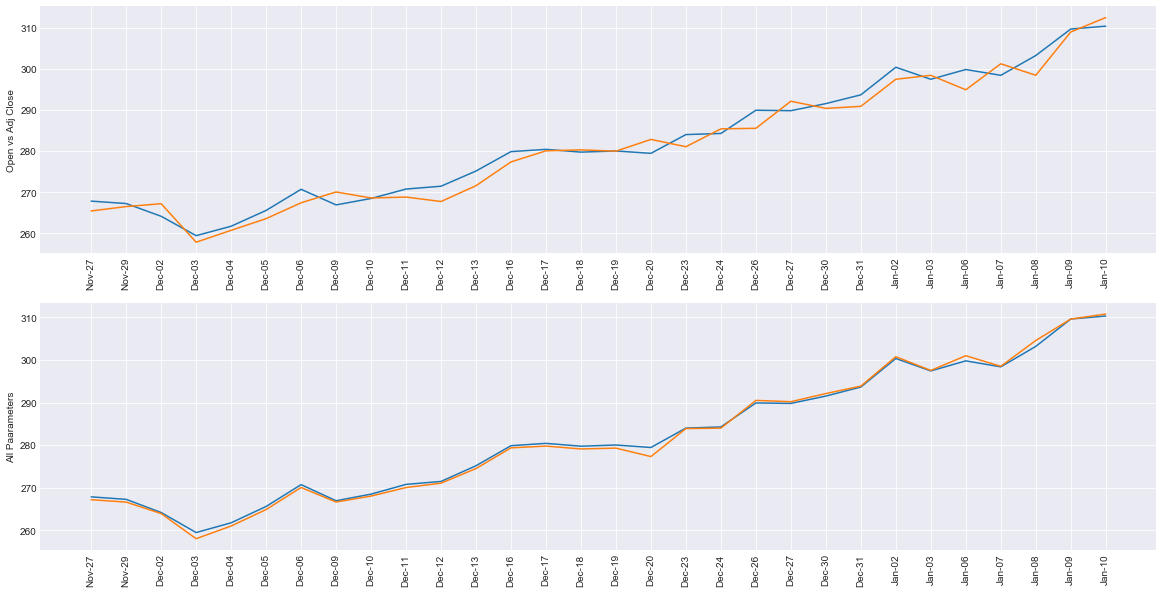

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()

ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")

plt.subplot(2, 1, 1)
plt.plot(x.strftime("%b-%d"), new_df['Adj Close']);
plt.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')
plt.ylabel('Open vs Adj Close')

plt.subplot(2, 1, 2)
plt.plot(x.strftime("%b-%d"), scaled_df['Adj Close'].tail(30));
plt.plot(x.strftime("%b-%d"), scaled_df['Predictions'].tail(30)); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')
plt.ylabel('All Paarameters')

plt.show()

In [47]:


pct_gain_loss = (scaled_df['Predictions'] -  scaled_df['Adj Close'])
pct_gain_loss

stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [48]:
# Per Day gain loss Actual 
currnt_pct = ((310.67-309.630005)/309.630005)*100
round(currnt_pct ,2)

0.34

In [49]:
scaled_df.tail()

,Adj Close,Predictions
Date,,
2020-01-06,299.799988,301.007269
2020-01-07,298.390015,298.519368
2020-01-08,303.190002,304.578958
2020-01-09,309.630005,309.618252
2020-01-10,310.329987,310.794221


In [50]:
310.329987+(310.329987 / (100 + 0.23)/100)
310.329987+310.329987*0.327654/100
#(310.657641-310.329987/310.329987)*100

311.346795615605

In [51]:
scaled_df.tail()

,Adj Close,Predictions
Date,,
2020-01-06,299.799988,301.007269
2020-01-07,298.390015,298.519368
2020-01-08,303.190002,304.578958
2020-01-09,309.630005,309.618252
2020-01-10,310.329987,310.794221


In [52]:

# Per Day gain loss predicted 
#prd_pct = ((310.794221-309.618252)/309.618252)*100
#round(prd_pct ,2)
pct_2019_df=pd.DataFrame()

pct_2019_df['gain_loss_pct']=stock_df['Adj Close'].pct_change() * 100

#get history rank 
stock_rnk_df = stock_df
stock_rnk_df['gain_loss_pct']=pct_2019_df

pct_2019_df=pct_2019_df.dropna()
#nw_lst=pct_2019_df.sample(5) 
#nw_lst['gain_loss_pct'] 

stock_rnk_df=stock_rnk_df.dropna()
stock_rnk_df.tail()

,High,Low,Open,Close,Volume,Adj Close,gain_loss_pct
Date,,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988,0.796825
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015,-0.470305
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002,1.608629
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005,2.124081
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987,0.226070


In [139]:
# Get next 1 month Business dates  
new_dts = pd.bdate_range(start='1/11/2020', end='2/18/2020')
new_dts 
abj_close=[range(len(new_dts))]
future_df=pd.DataFrame({"Date":new_dts})
future_df.set_index('Date')
#future_df['future_gain_loss']=pct_2019_df.sample(5)
future_df 
 

,Date
0,2020-01-13
1,2020-01-14
2,2020-01-15
3,2020-01-16
4,2020-01-17
5,2020-01-20
6,2020-01-21
7,2020-01-22
8,2020-01-23
9,2020-01-24


In [130]:
# Rank based on the gain loss pct 
cols = ['gain_loss_pct']
#['High','Low','Open','Close','Volume','Adj Close']
tups = stock_rnk_df[cols].sort_values(cols, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)

stock_rnk_df=stock_rnk_df.assign(Rank=factorized)

stock_rnk_df[stock_rnk_df['Rank']>1].sort_values(by=['Rank']).sample(5)
#stock_rnk_df['Rank'].sample(5)
#stock_rnk_df[stock_rnk_df['Rank']==1089]

# get last day actual Adj close
lst_rnk=stock_rnk_df['Rank'].tail(1)

nw_lst=pd.DataFrame()
#get the next n random gain_loss_pct 
#nw_lst['gain_loss_pct']=stock_rnk_df.sample(len(new_dts))['gain_loss_pct']
nw_lst['gain_loss_pct']=stock_rnk_df[stock_rnk_df['Rank']>lst_rnk[0]].sort_values(by=['Rank']).sample(len(new_dts))['gain_loss_pct']
#nw_lst=pct_2019_df.sample(5) 
nw_lst['gain_loss_pct'] 
#nw_lst.head()

Date
2015-06-05   -0.548867
2018-07-18   -0.548443
2019-10-24    0.164488
2018-06-21   -0.557639
2018-03-06   -0.084845
2017-04-21   -0.119361
2015-04-08   -0.325380
2015-11-05   -0.460984
2019-09-26   -0.515764
2016-08-30   -0.767629
2019-04-16    0.010040
2019-01-11   -0.981809
2019-05-06   -1.544274
2017-09-06   -0.104905
2016-06-03    0.204654
2017-12-07    0.183436
2017-08-10   -3.185177
2019-03-05   -0.181976
2018-12-06   -1.114957
2016-01-04    0.085483
2019-06-28   -0.911197
2016-10-03   -0.468837
2016-01-19   -0.483887
2016-06-02   -0.751556
2018-06-14    0.052441
2016-10-05    0.044252
2015-11-12   -0.335906
Name: gain_loss_pct, dtype: float64

In [131]:
# Random % from previous 5 years 
x_fut_gain_loss = [nw_lst['gain_loss_pct'][i] for i in range(len(nw_lst['gain_loss_pct']))]

future_df['Fut_PCT']=x_fut_gain_loss
future_df.head()

,Date,Fut_PCT
0,2020-01-13,-0.548867
1,2020-01-14,-0.548443
2,2020-01-15,0.164488
3,2020-01-16,-0.557639
4,2020-01-17,-0.084845


In [132]:
future_df.head(len(new_dts))

,Date,Fut_PCT
0,2020-01-13,-0.548867
1,2020-01-14,-0.548443
2,2020-01-15,0.164488
3,2020-01-16,-0.557639
4,2020-01-17,-0.084845
5,2020-01-20,-0.119361
6,2020-01-21,-0.325380
7,2020-01-22,-0.460984
8,2020-01-23,-0.515764
9,2020-01-24,-0.767629


In [133]:
fut_adj_open=[]
fut_adj_close=[]

# get the previous day open and close and calculated the Adj price
# for opening price just adding .05 with previous close 
fut_adj_open.append(stock_df['Adj Close'].tail(1)+ .05)
fut_adj_close.append(stock_df['Adj Close'].tail(1)+ (stock_df['Adj Close'].tail(1) * future_df['Fut_PCT'][0]/100))


for i in range(len(new_dts)-1):
    fut_adj_close.append(fut_adj_close[i]+ (fut_adj_close[i] * future_df['Fut_PCT'][i+1]/100))
    fut_adj_open.append(fut_adj_close[i]+ .05)


x_open=[i[0] for i in fut_adj_open]
x_adj=[i[0] for i in fut_adj_close]

future_df['Fut_Open']=x_open
future_df['Fut_Adj_Close']=x_adj

future_df.head()

,Date,Fut_PCT,Fut_Open,Fut_Adj_Close
0,2020-01-13,-0.548867,310.379987,308.626687
1,2020-01-14,-0.548443,308.676687,306.934045
2,2020-01-15,0.164488,306.984045,307.438913
3,2020-01-16,-0.557639,307.488913,305.724514
4,2020-01-17,-0.084845,305.774514,305.465122


In [134]:
#x_Adj_feature=future_df.drop(['Date','Fut_PCT'])
#x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]



x_Adj_feature = np.array(future_df.drop(['Date','Fut_PCT','Fut_Adj_Close'],1))
print((x_Adj_feature))

[[310.37998657]
 [308.67668665]
 [306.98404459]
 [307.48891315]
 [305.77451357]
 [305.51512167]
 [305.15051446]
 [304.15777938]
 [302.75589096]
 [301.19464215]
 [298.88296959]
 [298.91297171]
 [295.97870668]
 [291.40875662]
 [291.10310731]
 [291.69875874]
 [292.23374808]
 [282.92717846]
 [282.41241014]
 [279.26418959]
 [279.50287105]
 [276.95650502]
 [275.6582641 ]
 [274.32463201]
 [272.2633039 ]
 [272.40605588]
 [272.52657829]]


In [135]:
# Uer the regression model to predict the future predicted price
lr_fut_prediction = lr.predict(x_Adj_feature)
print(lr_fut_prediction)

[312.18752748 310.41062143 308.6448338  309.17151967 307.3830343
 307.11243307 306.73206979 305.69643481 304.2339654  302.60524903
 300.19368022 300.22497885 297.16391294 292.39647779 292.07762019
 292.69901201 293.2571203  283.54837804 283.0113646  279.72709734
 279.97609314 277.31968885 275.96534596 274.5740825  272.42367648
 272.57259732 272.69832797]


In [136]:
future_df['Model_Predict']=lr_fut_prediction
future_df=future_df.set_index('Date')
future_df.head()

,Fut_PCT,Fut_Open,Fut_Adj_Close,Model_Predict
Date,,,,
2020-01-13,-0.548867,310.379987,308.626687,312.187527
2020-01-14,-0.548443,308.676687,306.934045,310.410621
2020-01-15,0.164488,306.984045,307.438913,308.644834
2020-01-16,-0.557639,307.488913,305.724514,309.171520
2020-01-17,-0.084845,305.774514,305.465122,307.383034


In [137]:
scaled_df.tail()
old_vs_future=scaled_df.tail(10) 

nw=future_df[['Fut_Adj_Close','Model_Predict']]
#nw=nw.rename({'Fut_Adj_Close':'Adj Close','Model_Predict':'Prediction'})
nw.columns=['Adj Close','Predictions']
old_vs_future=old_vs_future.append(nw)

old_vs_future.head(15)


,Adj Close,Predictions
Date,,
2019-12-27,289.799988,290.200873
2019-12-30,291.519989,292.117112
2019-12-31,293.649994,293.862203
2020-01-02,300.350006,300.778697
2020-01-03,297.429993,297.546070
2020-01-06,299.799988,301.007269
2020-01-07,298.390015,298.519368
2020-01-08,303.190002,304.578958
2020-01-09,309.630005,309.618252


([<matplotlib.axis.XTick at 0x1a1f737588>,
 <a list of 37 Text xticklabel objects>)

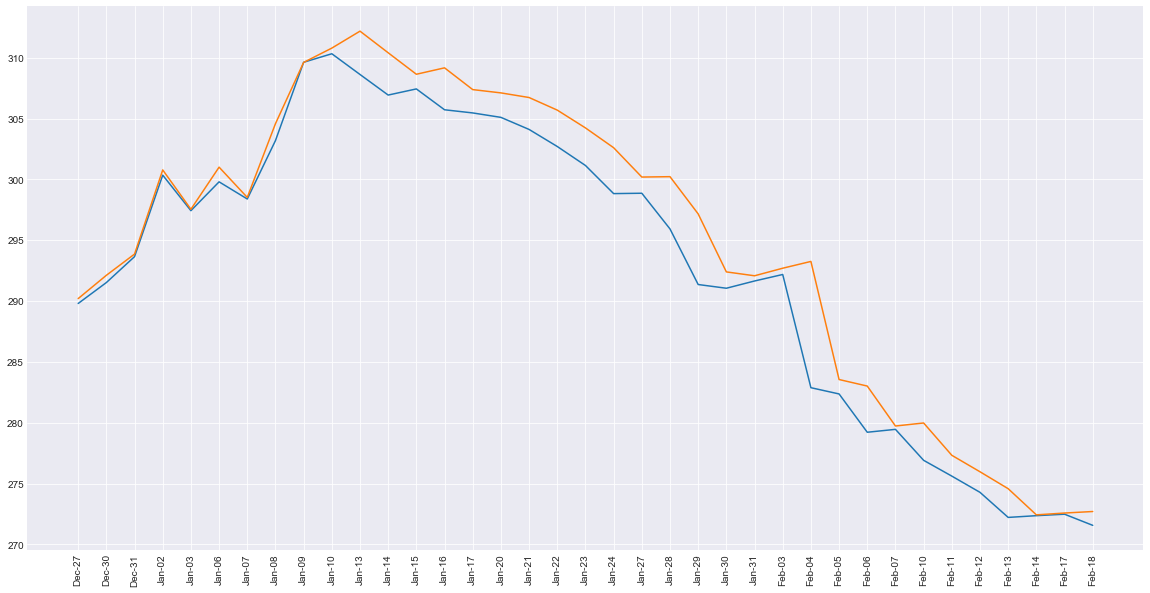

In [138]:
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = old_vs_future.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), old_vs_future['Adj Close']);
ax.plot(x.strftime("%b-%d"), old_vs_future['Predictions']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')